In [ ]:
!ls

requirements.txt  sample_data


In [ ]:
!touch requirements.txt

In [ ]:
!pip install -r requirements.txt

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Subset, DataLoader, random_split
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Data Transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
# Model definition
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(784,128)
        self.relu = nn.ReLU()
        self.out = nn.Linear(128,10)

    def forward(self,x):
        x = torch.flatten(x,1)
        x = self.fc(x)
        x = self.relu(x)
        x = self.out(x)
        return x




In [16]:
# Training Function
def train_model(model,train_set):
    batch_size = 64
    num_epochs = 10

    train_loader = DataLoader(train_set, batch_size = batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    model.train() # set the model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}: Loss = {running_loss / len(train_loader)}")

    print("Training complete")




In [7]:
# Evaluation Function

def evaluate_model(model,test_set):
    model.eval() # set the model to evaluation mode
    correct = 0
    total = 0
    total_loss = 0

    test_loader = DataLoader(test_set,batch_size=64,shuffle=False)
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs,labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs,labels)
            total_loss += loss.item()

    accuracy = correct / total
    average_loss = total_loss / len(test_loader)

    return average_loss, accuracy


In [8]:
# Data Manipulation Functions
def include_digits(dataset, included_digits):
    including_indices = [
        idx for idx in range(len(dataset)) if dataset[idx][1] in included_digits
    ]
    return torch.utils.data.Subset(dataset, including_indices)

def exclude_digits(dataset, excluded_digits):
    including_indices = [
        idx for idx in range(len(dataset)) if dataset[idx][1] not in excluded_digits
    ]
    return torch.utils.data.Subset(dataset, including_indices)

In [9]:
# Visualising functions
def plot_distribution(dataset, title):
    labels = [data[1] for data in dataset]
    unique_labels, label_counts = torch.unique(torch.tensor(labels), return_counts=True)

    plt.figure(figsize=(4, 2))

    counts_dict = {
        label.item(): count.item() for label, count in zip(unique_labels, label_counts)
    }

    all_labels = np.arange(10)
    all_label_counts = [counts_dict.get(label, 0) for label in all_labels]

    plt.bar(all_labels, all_label_counts)
    plt.title(title)
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.xticks(all_labels)
    plt.show()

def compute_confusion_matrix(model, testset):
    true_labels = []
    predicted_labels = []

    for image, label in testset:
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)

        true_labels.append(label)
        predicted_labels.append(predicted.item())

    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    cm = confusion_matrix(true_labels, predicted_labels)

    return cm

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [10]:
# Without FEDERATED LEARNING EXAMPLE

In [11]:
trainset = datasets.MNIST("./MNIST_data/",download=True,train=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31924294.64it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1091646.94it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9047974.11it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2307756.36it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [12]:
total_length = len(trainset)
split_size = total_length//3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

In [13]:
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

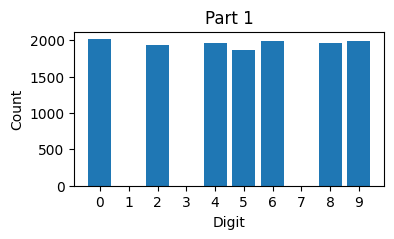

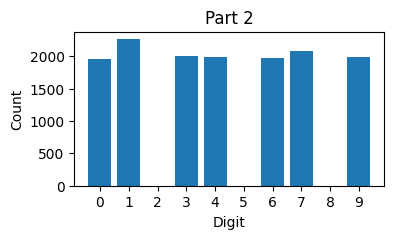

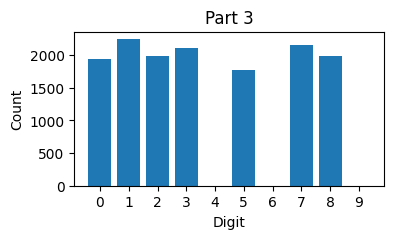

In [14]:
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

In [17]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5120492866566014
Epoch 2: Loss = 0.23714013671459153
Epoch 3: Loss = 0.19103869073266208
Epoch 4: Loss = 0.16711511220349823
Epoch 5: Loss = 0.13221902115227177
Epoch 6: Loss = 0.11425640738547542
Epoch 7: Loss = 0.09719622929602169
Epoch 8: Loss = 0.08240503308818091
Epoch 9: Loss = 0.07426244545901238
Epoch 10: Loss = 0.06374733516686532
Training complete
Epoch 1: Loss = 0.40405456986211774
Epoch 2: Loss = 0.1840380294514554
Epoch 3: Loss = 0.1567811983903604
Epoch 4: Loss = 0.12827684663768327
Epoch 5: Loss = 0.1110435002732889
Epoch 6: Loss = 0.09764334239298478
Epoch 7: Loss = 0.0877910879581967
Epoch 8: Loss = 0.07779132196031112
Epoch 9: Loss = 0.07242092863972564
Epoch 10: Loss = 0.06357666586960217
Training complete
Epoch 1: Loss = 0.4877706454680847
Epoch 2: Loss = 0.259033681271044
Epoch 3: Loss = 0.19009355219030702
Epoch 4: Loss = 0.15565417906655385
Epoch 5: Loss = 0.13178680506576826
Epoch 6: Loss = 0.10923748137009842
Epoch 7: Loss = 0.0926544993847340

In [18]:
# Evaluate
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

In [19]:
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

In [20]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6537, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6898, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6799, Test Accuracy on [4,6,9]: 0.0000


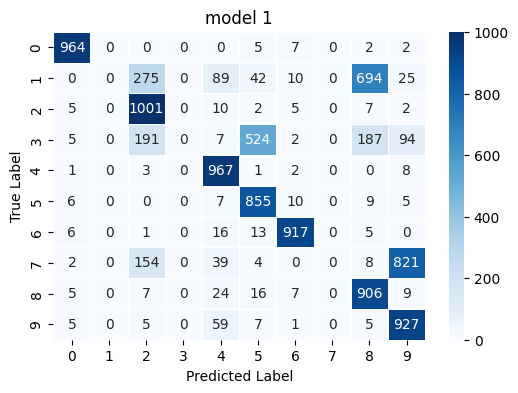

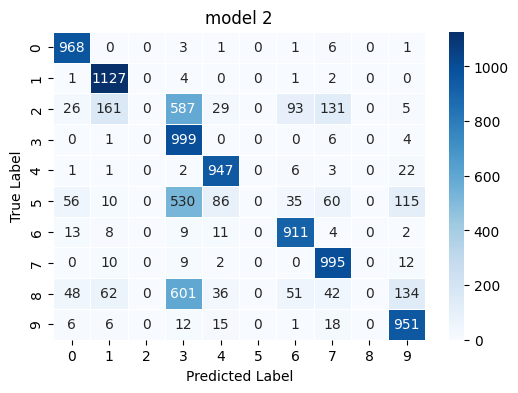

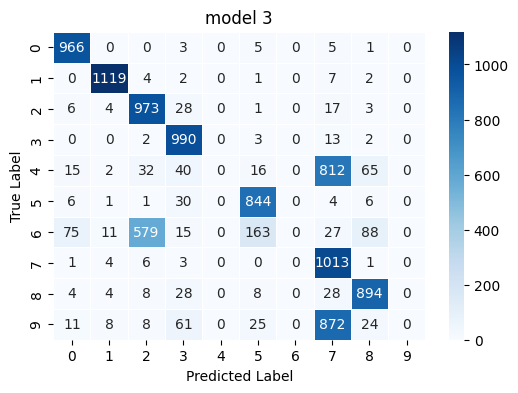

In [21]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")